In [1]:
import sys 
sys.path.append('../scripts/')
from robot import *
from scipy.stats import multivariate_normal

In [2]:
class Particle: ###Particle5
    def __init__(self, init_pose):
        self.pose = init_pose
        
    def motion_update(self, nu, omega, time, noise_rate_pdf): #追加
        ns = noise_rate_pdf.rvs() #順にnn, no, on, oo
        noised_nu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        noised_omega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)
        self.pose = IdealRobot.state_transition(noised_nu, noised_omega, time, self.pose)

In [3]:
class Mcl: 
    def __init__(self, init_pose, num, motion_noise_stds): 
        self.particles = [Particle(init_pose) for i in range(num)]
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu, omega, time): ###Mcl5###
        for p in self.particles: p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
        
    def draw(self, ax, elems): 
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))

In [4]:
class EstimationAgent(Agent):        ###EstimationAgent5
    def __init__(self, time_interval, nu, omega, estimator):
        super().__init__(nu, omega)
        self.estimator = estimator
        self.time_interval = time_interval
        
        self.prev_nu = 0.0       #追加
        self.prev_omega = 0.0 #追加
        
    def decision(self, observation=None): #追加
        self.estimator.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)

In [5]:
initial_pose = np.array([0, 0, 0]).T   ###mcl5_test（下の出力の先頭数行を記載）
estimator = Mcl(initial_pose, 100, motion_noise_stds={"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})
a = EstimationAgent(0.1, 0.2, 10.0/180*math.pi, estimator)
estimator.motion_update(0.2, 10.0/180*math.pi, 0.1)
for p in estimator.particles:
    print(p.pose)

[0.01870132 0.00012695 0.01357589]
[0.02090289 0.00017194 0.01645092]
[0.02108303 0.00027981 0.02654162]
[0.01691032 0.00015272 0.01806153]
[0.02068077 0.00017961 0.01736938]
[0.01870821 0.00020393 0.02180045]
[0.02467683 0.0001392  0.01128207]
[0.01847084 0.00019013 0.02058594]
[1.84632863e-02 7.81265202e-05 8.46285464e-03]
[2.30484542e-02 3.86205093e-05 3.35124194e-03]
[0.02375699 0.00020809 0.0175175 ]
[0.02422901 0.00024745 0.02042521]
[0.0210151  0.0001247  0.01186732]
[0.02380351 0.00018966 0.01593552]
[0.01519673 0.00012764 0.01679826]
[0.02025076 0.00025844 0.02552272]
[0.01895205 0.00024508 0.02586135]
[0.021059   0.00019159 0.01819548]
[0.02339121 0.00023377 0.01998747]
[0.01947828 0.00012872 0.01321708]
[0.02569274 0.0003313  0.02578834]
[0.02318165 0.00014823 0.01278814]
[0.0237709  0.00021046 0.01770682]
[0.02027686 0.00012607 0.01243457]
[0.01831924 0.0002114  0.02307879]
[2.38277079e-02 5.02157395e-05 4.21489682e-03]
[0.01676368 0.00014934 0.01781704]
[0.01710013 0.00015

<IPython.core.display.Javascript object>


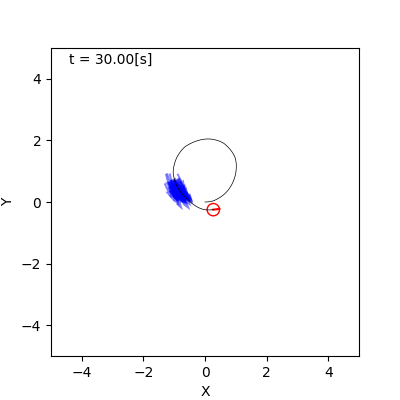

In [6]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(30, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()
    
trial({"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})

In [7]:
#trial({"nn":0.001, "no":0.002, "on":0.003, "oo":0.004})

In [8]:
#trial({"nn":1, "no":2, "on":3, "oo":4})

<IPython.core.display.Javascript object>


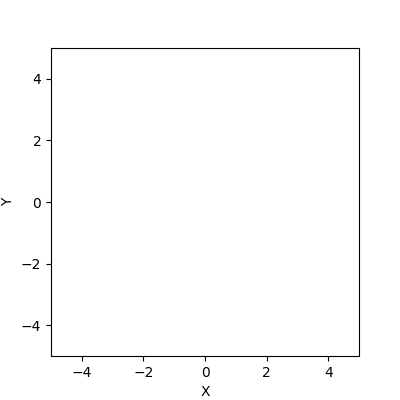

In [9]:
trial({"nn":0.19, "no":0.001, "on":0.13, "oo":0.2})

In [10]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(40, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.1, 0.0, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()

#trial({"nn":0.001, "no":0.001, "on":0.13, "oo":0.001})